# About Dataset
Context of dataset

There has been a rise in the demand of online delivery in the metropolitan cities such as Bangalore in India. The question about why this increase in the demand has always been a lingering (slow in demand) question. So a survey is conducted and the data is presented.

In [1]:
## Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statistics as stats
%matplotlib inline

In [2]:
## Read CSV file
df = pd.read_csv("D:/python_projects/ML_Projects/03_DecisionTreeClassifier/onlinedeliverydata.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [3]:
df.drop(["latitude","longitude", "Pin code", "Reviews", "Educational Qualifications"], axis=1, inplace= True)

In [4]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,Female,Single,Student,No Income,4,Food delivery apps,Web browser,Breakfast,Lunch,...,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes
1,24,Female,Single,Student,Below Rs.10000,3,Food delivery apps,Web browser,Snacks,Dinner,...,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes
2,22,Male,Single,Student,Below Rs.10000,3,Food delivery apps,Direct call,Lunch,Snacks,...,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes
3,22,Female,Single,Student,No Income,6,Food delivery apps,Walk-in,Snacks,Dinner,...,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes
4,22,Male,Single,Student,Below Rs.10000,4,Walk-in,Direct call,Lunch,Dinner,...,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes


In [5]:
## find null values
df.isnull().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Family size                                  0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food quality                            0
Good Tracking system                         0
Self Cooking                                 0
Health Concern                               0
Late Delivery

In [6]:
## find unique values for each variables(columns)
colnames = df.columns
for i in range(len(colnames)):
    col = colnames[i]
    print(col)
    print(df[col].unique())

Age
[20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Gender
['Female' 'Male']
Marital Status
['Single' 'Married' 'Prefer not to say']
Occupation
['Student' 'Employee' 'Self Employeed' 'House wife']
Monthly Income
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Family size
[4 3 6 2 5 1]
Medium (P1)
['Food delivery apps' 'Walk-in' 'Direct call' 'Web browser']
Medium (P2)
[' Web browser' ' Direct call' ' Walk-in']
Meal(P1)
['Breakfast' 'Snacks' 'Lunch' 'Dinner']
Meal(P2)
[' Lunch' ' Dinner' ' Snacks']
Perference(P1)
['Non Veg foods (Lunch / Dinner)' 'Veg foods (Breakfast / Lunch / Dinner)'
 'Bakery items (snacks)' 'Sweets']
Perference(P2)
[' Bakery items (snacks)' ' Veg foods (Breakfast / Lunch / Dinner)'
 ' Ice cream / Cool drinks' ' Sweets']
Ease and convenient
['Neutral' 'Strongly agree' 'Agree' 'Strongly disagree' 'Disagree']
Time saving
['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
More restaurant choices
['Neutral' 'Strongly

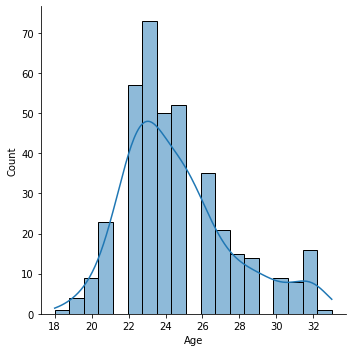

In [7]:
## Distribution plot of age variable.
sns.displot(df.Age, kde = True)


In [8]:
## labeling of each colums
var = 0
dummy = {}
class filterDf:
    def __init__(self, var):
        self.var = sorted(var.unique())
    def mapVar(self):
        for i in range(len(self.var)):
            if type(self.var[i]) == str:
                #print(f"string value: {self.var[i]}")
                dummy[self.var[i]] = pd.to_numeric(i)
            else:
                continue


In [9]:
## Run the above code using class and methods
for i in range(len(colnames)):
    col = colnames[i]
    #print(col)
    df_filter = filterDf(df[col])
    df_filter.mapVar()

In [10]:
print(dummy)

{'Female': 0, 'Male': 1, 'Married': 0, 'Prefer not to say': 1, 'Single': 2, 'Employee': 0, 'House wife': 1, 'Self Employeed': 2, 'Student': 3, '10001 to 25000': 0, '25001 to 50000': 1, 'Below Rs.10000': 2, 'More than 50000': 3, 'No Income': 4, 'Direct call': 0, 'Food delivery apps': 1, 'Walk-in': 2, 'Web browser': 3, ' Direct call': 0, ' Walk-in': 1, ' Web browser': 2, 'Breakfast': 0, 'Dinner': 1, 'Lunch': 2, 'Snacks': 3, ' Dinner': 0, ' Lunch': 1, ' Snacks': 2, 'Bakery items (snacks)': 0, 'Non Veg foods (Lunch / Dinner)': 1, 'Sweets': 2, 'Veg foods (Breakfast / Lunch / Dinner)': 3, ' Bakery items (snacks)': 0, ' Ice cream / Cool drinks': 1, ' Sweets': 2, ' Veg foods (Breakfast / Lunch / Dinner)': 3, 'Agree': 0, 'Disagree': 1, 'Neutral': 2, 'Strongly agree': 3, 'Strongly disagree': 4, 'Maybe': 0, 'No': 0, 'Yes': 1, 'Anytime (Mon-Sun)': 0, 'Weekdays (Mon-Fri)': 1, 'Weekend (Sat & Sun)': 2, '15 minutes': 0, '30 minutes': 1, '45 minutes': 2, '60 minutes': 3, 'More than 60 minutes': 4, 'St

In [11]:
type(dummy.values())

dict_values

In [12]:
## labling on corrosponding variables

dataset = []
for i in range(len(colnames)):
    #print(colnames[i])
    xol = colnames[i]
    xol = []
    for j in range(len(df[colnames[i]])):
        if type(df[colnames[i]][j]) == str:
            xol.append(dummy[df[colnames[i]][j]])
        else:
            continue
    dataset.append(xol)
       

In [13]:
## converting Rows into columns and make DF
df1 = pd.DataFrame(dataset).transpose()

In [14]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,NaN,0.0,2.0,3.0,4.0,NaN,1.0,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,NaN,0.0,2.0,3.0,2.0,NaN,1.0,2.0,3.0,0.0,...,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0
2,NaN,1.0,2.0,3.0,2.0,NaN,1.0,0.0,2.0,2.0,...,1.0,0.0,4.0,1.0,4.0,4.0,0.0,4.0,1.0,1.0
3,NaN,0.0,2.0,3.0,4.0,NaN,1.0,1.0,3.0,0.0,...,1.0,4.0,0.0,1.0,4.0,4.0,4.0,4.0,0.0,1.0
4,NaN,1.0,2.0,3.0,2.0,NaN,2.0,0.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0


In [15]:
## Naming of lables
df1.columns = df.columns
df1.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,NaN,0.0,2.0,3.0,4.0,NaN,1.0,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,NaN,0.0,2.0,3.0,2.0,NaN,1.0,2.0,3.0,0.0,...,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0
2,NaN,1.0,2.0,3.0,2.0,NaN,1.0,0.0,2.0,2.0,...,1.0,0.0,4.0,1.0,4.0,4.0,0.0,4.0,1.0,1.0
3,NaN,0.0,2.0,3.0,4.0,NaN,1.0,1.0,3.0,0.0,...,1.0,4.0,0.0,1.0,4.0,4.0,4.0,4.0,0.0,1.0
4,NaN,1.0,2.0,3.0,2.0,NaN,2.0,0.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0


In [16]:
type(df1.Gender[0])

numpy.float64

In [17]:
df1["Age"] = df["Age"]
df1["Family size"] = df["Family size"]
df1.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0.0,2.0,3.0,4.0,4,1.0,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,24,0.0,2.0,3.0,2.0,3,1.0,2.0,3.0,0.0,...,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0
2,22,1.0,2.0,3.0,2.0,3,1.0,0.0,2.0,2.0,...,1.0,0.0,4.0,1.0,4.0,4.0,0.0,4.0,1.0,1.0
3,22,0.0,2.0,3.0,4.0,6,1.0,1.0,3.0,0.0,...,1.0,4.0,0.0,1.0,4.0,4.0,4.0,4.0,0.0,1.0
4,22,1.0,2.0,3.0,2.0,4,2.0,0.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0


In [18]:
df1 = df1.astype('int')
df1.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,4,1,2,0,1,...,1,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,3,1,2,3,0,...,1,4,4,4,4,4,4,4,4,1
2,22,1,2,3,2,3,1,0,2,2,...,1,0,4,1,4,4,0,4,1,1
3,22,0,2,3,4,6,1,1,3,0,...,1,4,0,1,4,4,4,4,0,1
4,22,1,2,3,2,4,2,0,2,0,...,1,0,0,1,0,0,0,4,4,1


In [19]:
df1.corr()

,Age,Gender,Marital Status,Occupation,Monthly Income,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
Age,1.000000,0.062038,-0.663269,-0.579334,-0.309798,0.169982,-0.015215,0.161314,0.048662,0.068714,...,-0.080493,-0.037603,-0.079713,0.001899,0.137758,-0.118430,-0.065830,-0.153757,0.014193,-0.248052
Gender,0.062038,1.000000,0.031781,-0.004934,0.005281,-0.082488,0.030778,0.030033,0.175489,-0.060727,...,0.004270,-0.026808,0.025279,-0.099028,0.060679,-0.076577,-0.050450,-0.076397,0.019970,0.034701
Marital Status,-0.663269,0.031781,1.000000,0.557267,0.297593,-0.207170,0.051060,-0.112273,-0.091906,-0.085144,...,-0.045444,0.083885,0.151543,-0.121723,-0.047141,0.139903,-0.007379,0.139225,0.052760,0.268759
Occupation,-0.579334,-0.004934,0.557267,1.000000,0.620219,-0.056563,0.038962,-0.143215,-0.086783,-0.036593,...,-0.004363,0.085648,0.067409,-0.074545,-0.061208,0.165154,0.065902,0.126377,0.066929,0.253506
Monthly Income,-0.309798,0.005281,0.297593,0.620219,1.000000,0.018184,-0.018996,-0.025922,-0.080263,0.031649,...,0.070027,0.030912,0.066959,-0.033065,0.007218,0.046827,0.091548,0.068333,0.052460,0.211994
Family size,0.169982,-0.082488,-0.207170,-0.056563,0.018184,1.000000,0.107565,0.007501,0.150857,0.062096,...,0.028876,-0.003834,-0.083490,0.089040,0.009255,0.036915,-0.053966,0.016033,-0.013725,-0.043780
Medium (P1),-0.015215,0.030778,0.051060,0.038962,-0.018996,0.107565,1.000000,-0.128348,-0.013412,-0.064939,...,-0.093121,-0.039503,-0.032163,0.009020,-0.030914,-0.048346,-0.020707,-0.003912,0.041306,0.102325
Medium (P2),0.161314,0.030033,-0.112273,-0.143215,-0.025922,0.007501,-0.128348,1.000000,0.057788,0.116463,...,0.032064,-0.041654,0.061162,0.079324,0.092889,-0.121573,-0.103756,-0.212797,-0.130414,-0.020451
Meal(P1),0.048662,0.175489,-0.091906,-0.086783,-0.080263,0.150857,-0.013412,0.057788,1.000000,-0.280820,...,0.061322,0.014284,-0.004545,-0.080454,-0.060605,-0.052309,-0.117096,-0.077250,-0.089567,0.039707
Meal(P2),0.068714,-0.060727,-0.085144,-0.036593,0.031649,0.062096,-0.064939,0.116463,-0.280820,1.000000,...,0.039483,-0.077517,-0.106631,0.177848,0.082747,0.069389,0.060683,0.020513,0.026742,-0.019902


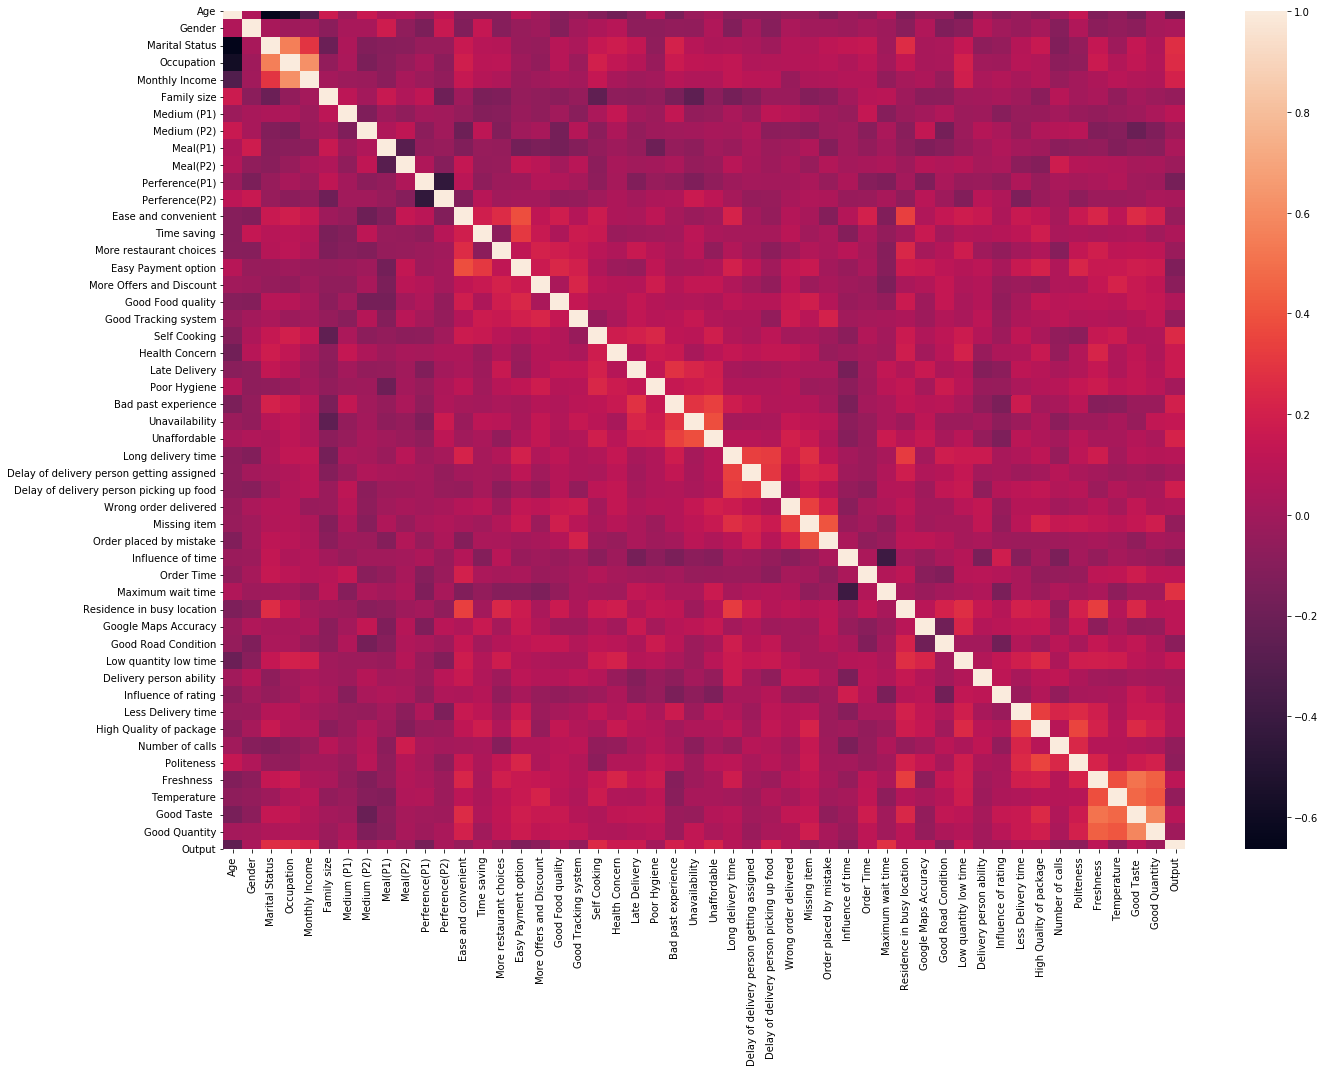

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr('pearson'))
plt.tight_layout()

In [20]:
## Split data into train and test dataset

In [21]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [22]:
X,y

(     Age  Gender  Marital Status  Occupation  Monthly Income  Family size  \
 0     20       0               2           3               4            4   
 1     24       0               2           3               2            3   
 2     22       1               2           3               2            3   
 3     22       0               2           3               4            6   
 4     22       1               2           3               2            4   
 ..   ...     ...             ...         ...             ...          ...   
 383   23       0               2           3               4            2   
 384   23       0               2           3               4            4   
 385   22       0               2           3               4            5   
 386   23       1               2           3               2            2   
 387   23       1               2           3               4            5   
 
      Medium (P1)  Medium (P2)  Meal(P1)  Meal(P2)  ...  \
 0 

# Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.30, random_state=45)

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [28]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'], 'C': [1,2,3,4,5,6,10,20,30,40,50,60], 'max_iter':[100,200,300]}

In [29]:
classifier_regressor = GridSearchCV(classifier, param_grid = parameter, scoring = 'accuracy', cv = 5)

In [30]:
classifier_regressor.fit(X_train, y_train)

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (s

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 60],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [31]:
classifier_regressor.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [32]:
classifier_regressor.best_score_

0.8117845117845117

In [34]:
## make prediction
y_pred = classifier_regressor.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1])

In [35]:
from sklearn.metrics import accuracy_score, classification_report

In [37]:
score = accuracy_score(y_pred, y_test)
score

0.8290598290598291

In [38]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.43      0.75      0.55        16
           1       0.96      0.84      0.89       101

    accuracy                           0.83       117
   macro avg       0.69      0.80      0.72       117
weighted avg       0.88      0.83      0.85       117



# DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()

In [26]:
## fit the train data into treemodel
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
## make a decision tree

[Text(483.890625, 1032.8400000000001, 'X[34] <= 0.5\ngini = 0.341\nsamples = 271\nvalue = [59, 212]'),
 Text(209.25, 924.1200000000001, 'X[0] <= 23.5\ngini = 0.408\nsamples = 28\nvalue = [20, 8]'),
 Text(156.9375, 815.4000000000001, 'X[29] <= 1.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(104.625, 706.6800000000001, 'X[30] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(52.3125, 597.96, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(156.9375, 597.96, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(209.25, 706.6800000000001, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(261.5625, 815.4000000000001, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(758.53125, 924.1200000000001, 'X[25] <= 0.5\ngini = 0.269\nsamples = 243\nvalue = [39, 204]'),
 Text(418.5, 815.4000000000001, 'X[42] <= 0.5\ngini = 0.5\nsamples = 45\nvalue = [23, 22]'),
 Text(313.875, 706.6800000000001, 'X[33] <= 0.5\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(261.5625, 597.96, 'gini 

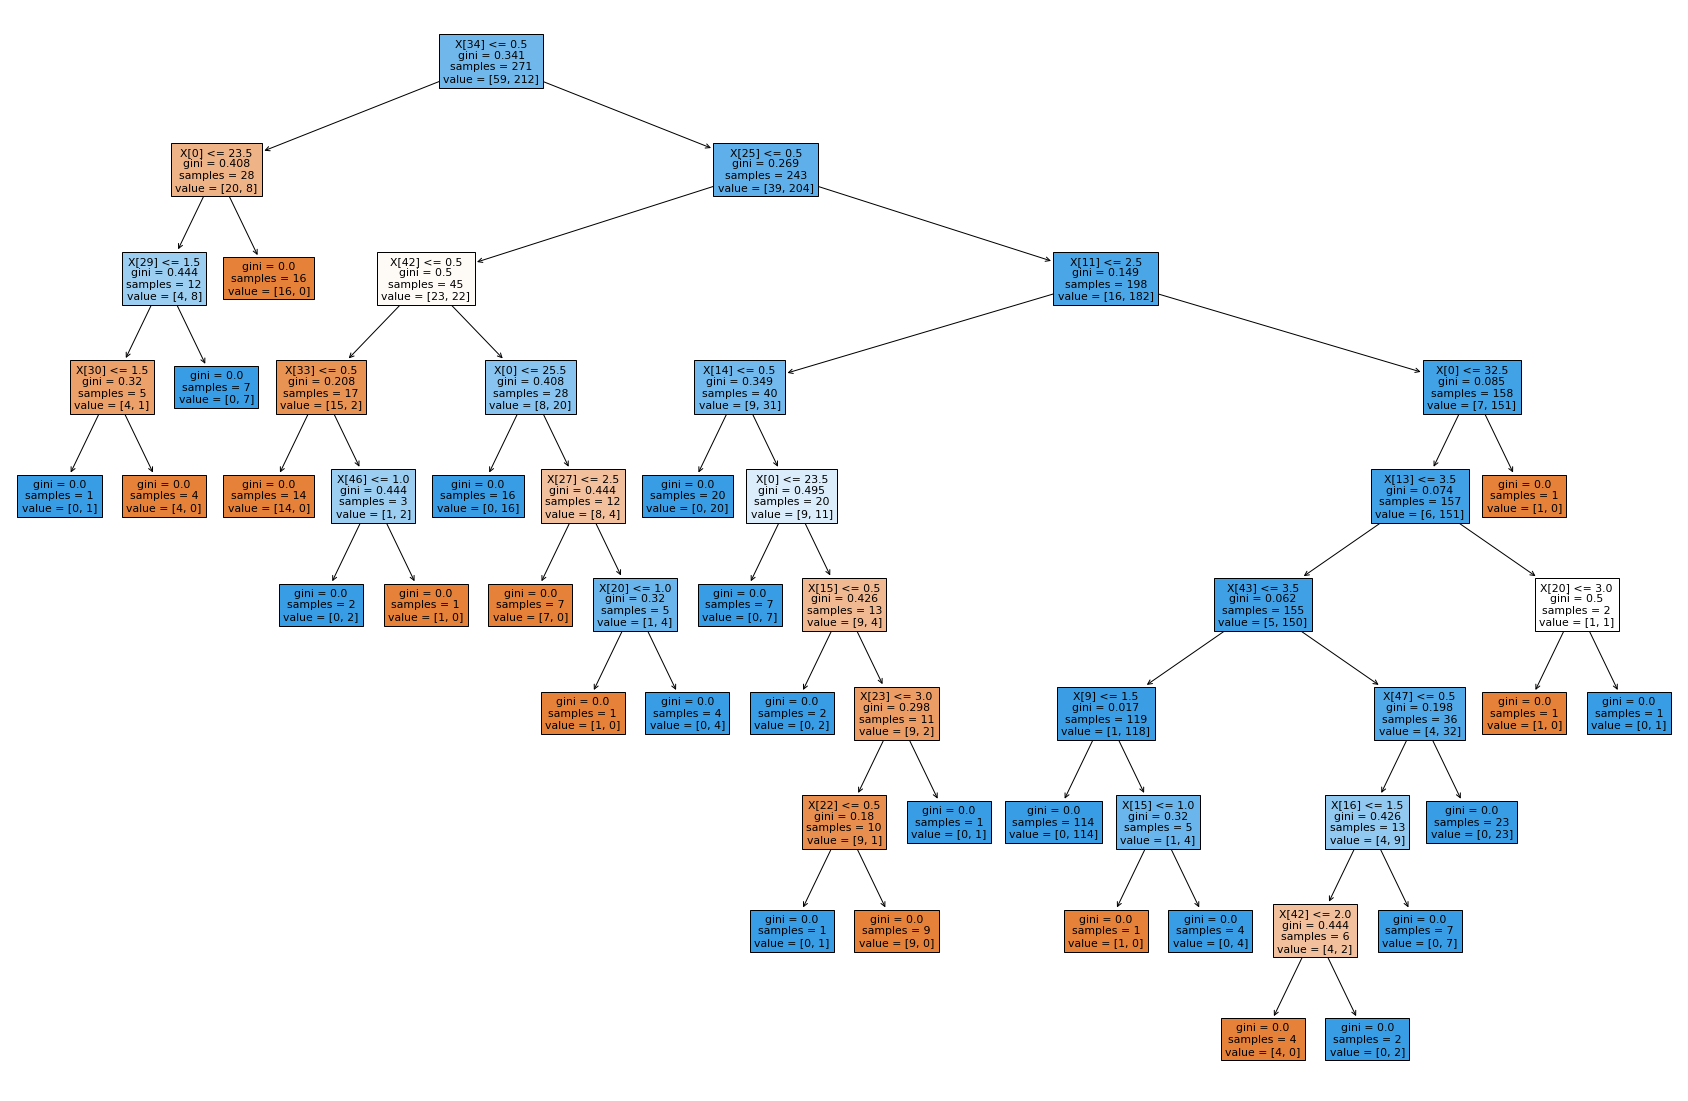

In [28]:
from sklearn import tree
plt.figure(figsize=(30, 20))
tree.plot_tree(treemodel, filled= True)

# Post Prunning "max_depth"

In [29]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(max_depth = 3)

In [30]:
## fit the train data into treemodel
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(383.625, 475.65000000000003, 'X[34] <= 0.5\ngini = 0.341\nsamples = 271\nvalue = [59, 212]'),
 Text(209.25, 339.75, 'X[0] <= 23.5\ngini = 0.408\nsamples = 28\nvalue = [20, 8]'),
 Text(139.5, 203.85000000000002, 'X[29] <= 1.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(69.75, 67.94999999999999, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(209.25, 67.94999999999999, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(279.0, 203.85000000000002, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(558.0, 339.75, 'X[25] <= 0.5\ngini = 0.269\nsamples = 243\nvalue = [39, 204]'),
 Text(418.5, 203.85000000000002, 'X[42] <= 0.5\ngini = 0.5\nsamples = 45\nvalue = [23, 22]'),
 Text(348.75, 67.94999999999999, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(488.25, 67.94999999999999, 'gini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(697.5, 203.85000000000002, 'X[11] <= 2.5\ngini = 0.149\nsamples = 198\nvalue = [16, 182]'),
 Text(627.75, 67.94999999999999, 'gini = 0.349\ns

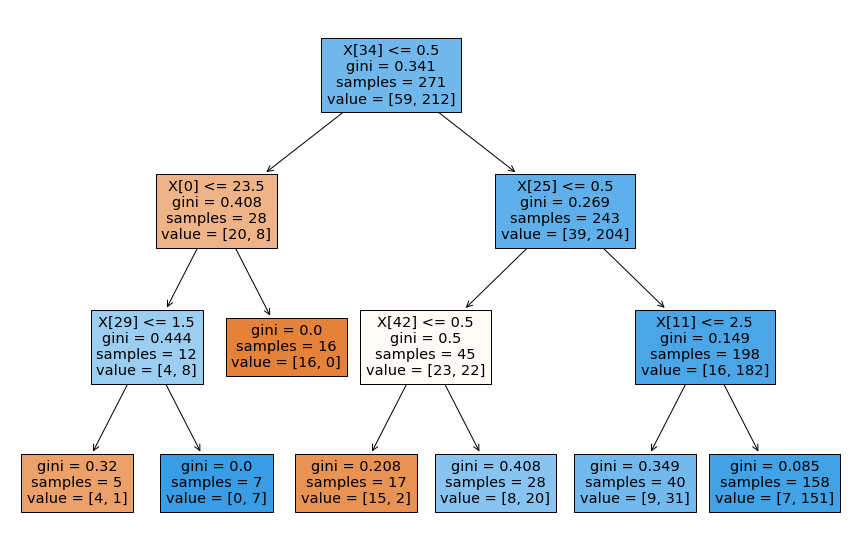

In [31]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled= True)

In [32]:
## this increase in the demand has always been a lingering (slow in demand) because if these factors.
df1.columns[[0,11,25,29,42]]

Index(['Age', 'Perference(P2)', 'Unaffordable', 'Wrong order delivered',
       'High Quality of package'],
      dtype='object')

In [53]:
factors = df1.columns[[0,11,25,29,42]]
for i in range(len(factors)):
    print(f"{factors[i]} : {df[factors[i]].unique()}")

Age : [20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Perference(P2) : [' Bakery items (snacks)' ' Veg foods (Breakfast / Lunch / Dinner)'
 ' Ice cream / Cool drinks' ' Sweets']
Unaffordable : ['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
Wrong order delivered : ['Agree' 'Strongly agree' 'Disagree' 'Neutral' 'Strongly disagree']
High Quality of package : ['Moderately Important' 'Very Important' 'Important' 'Unimportant'
 'Slightly Important']


In [33]:
## make prediction
y_pred = treemodel.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [34]:
from sklearn.metrics import classification_report, accuracy_score

In [35]:
score = accuracy_score(y_pred, y_test)
score

0.8632478632478633

In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.46      0.93      0.62        14
           1       0.99      0.85      0.92       103

    accuracy                           0.86       117
   macro avg       0.73      0.89      0.77       117
weighted avg       0.93      0.86      0.88       117



# Pre Prunning

In [37]:
parameter = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth' : [1, 2, 3, 4, 5]
}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
treemodel = DecisionTreeClassifier(max_depth=2)
cv = GridSearchCV(treemodel, param_grid=parameter, cv= 5, scoring="accuracy")

In [40]:
cv.fit(X_train, y_train)

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most 

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most 

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [43]:
## make prediction

In [44]:
y_pred = cv.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [45]:
from sklearn.metrics import classification_report, accuracy_score

In [46]:
score = accuracy_score(y_pred, y_test)
score

0.8803418803418803

In [47]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        22
           1       0.96      0.89      0.92        95

    accuracy                           0.88       117
   macro avg       0.80      0.86      0.82       117
weighted avg       0.90      0.88      0.89       117

